In [22]:
import os
import sys
import math
import numpy as np
import pandas as pd

# 1. Nhập đồ thị web - tạo ma trận xác suất chuyển đổi

![alt text](PageRanks-Example.png)

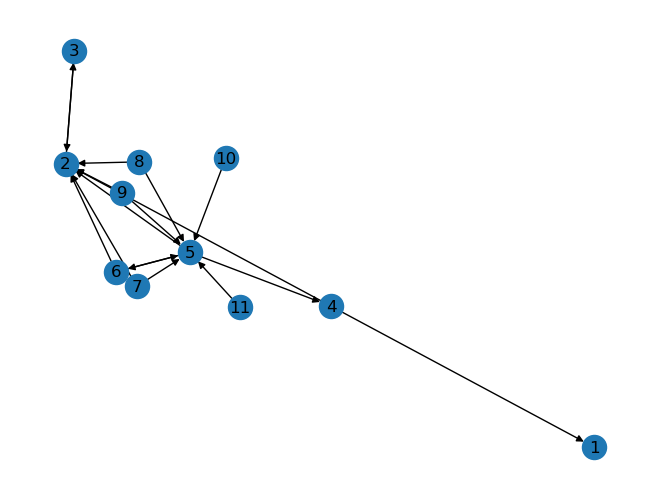

In [23]:
import networkx as nx
graph = {
  'A' : [],
  'B' : ['C'],
  'C' : ['B'],
  'D' : ['A', 'B'],
  'E' : ['B', 'D', 'F'],
  'F' : ['B', 'E'],
  'G' : ['B', 'E'],
  'H' : ['B', 'E'],
  'I' : ['B', 'E'],
  'J' : ['E'],
  'K' : ['E'],
}
G = nx.DiGraph(graph)
G = nx.convert_node_labels_to_integers(G, 1)
nx.draw(G, with_labels = True)

In [25]:
matrix = np.array((nx.to_numpy_matrix(G))).T
v = len(graph)
csAdjmatrix = matrix.copy()
col_sum = matrix.sum(axis = 0)
for j in range(v):
    if (col_sum[j] != 0):
        for i in range(v):
            csAdjmatrix[i][j] = matrix[i][j]/col_sum[j]

colsAdjmatrix = pd.DataFrame(csAdjmatrix)
print('M = ', end = '\n')
print(colsAdjmatrix)

M = 
     0    1    2    3         4    5    6    7    8    9    10
0   0.0  0.0  0.0  0.5  0.000000  0.0  0.0  0.0  0.0  0.0  0.0
1   0.0  0.0  1.0  0.5  0.333333  0.5  0.5  0.5  0.5  0.0  0.0
2   0.0  1.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0
3   0.0  0.0  0.0  0.0  0.333333  0.0  0.0  0.0  0.0  0.0  0.0
4   0.0  0.0  0.0  0.0  0.000000  0.5  0.5  0.5  0.5  1.0  1.0
5   0.0  0.0  0.0  0.0  0.333333  0.0  0.0  0.0  0.0  0.0  0.0
6   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0
7   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0
8   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0
9   0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0
10  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0


# 2. Thuật toán PageRank

In [16]:
#Lấy các node có trong ma trận
def Get_Nodes(matrix):
    nodes = set()
    for col_key in matrix:
        nodes.add(col_key)
    return nodes

In [17]:
#Đảm bảo các cột đều có tổng là 1 -> thỏa điều kiện của ma trận
def Check_Cols(matrix):
    #kiểm tra từng cột
    for col_key in matrix:
        if matrix[col_key].sum() == 0.0: #nếu sum = 0 -> không thỏa -> thêm vào giá trị 1/(số lượng node)
            matrix[col_key] = pd.Series(np.ones(len(matrix[col_key]))/len(matrix[col_key]), index=matrix.index)
    return matrix

In [18]:
#Tạo ma trận của Google
def google_random_surfer_matrix(transition_probabilities, nodes, damping_factor):
    #matrix = damping_factor*adj_matrix + (1-damping_factor)*[1/N]_(NxN mattrix)
    alpha = (1-damping_factor) * 1.0/float(len(nodes))
    return transition_probabilities.copy().multiply(damping_factor) + alpha

In [19]:
#Khởi tạo vector ban đầu
def start_vector(nodes):
    #mỗi hàng = 1/N
    start = 1.0 / float(len(nodes))
    return pd.Series({node : start for node in nodes})

In [20]:
#Kiểm tra điều kiện của 2 lần lặp -> tính khoảng cách của 2 vector vơí nhau xem đã thỏa điều kiện chêch lệch < delta chưa
def euclidean_norm(vector):
    #Độ dài Euclidean = sqrt(x_1^2+x_2^2+...+x_n^2) = sqrt(tích vô hướng)
    return math.sqrt(vector.dot(vector))

In [26]:
def power_iteration(adj_matrix, damping_factor = 0.85, delta = 0.00001, max_iterations = 1000):
    nodes = Get_Nodes(adj_matrix)
    adj_matrix = Check_Cols(adj_matrix)
    gmatrix = google_random_surfer_matrix(adj_matrix, nodes, damping_factor)
    vector = start_vector(nodes)
    #print(vector)
    #Power iteration
    for iteration in range(max_iterations):
        old_vector = vector.copy()
        vector = gmatrix.dot(vector)
        d = vector - old_vector
        if euclidean_norm(d) < delta:
            break
    return vector

power_iteration(colsAdjmatrix, 0.85, 0.00001, 100000)

0     0.032781
1     0.384398
2     0.342913
3     0.039087
4     0.080886
5     0.039087
6     0.016169
7     0.016169
8     0.016169
9     0.016169
10    0.016169
dtype: float64

A: 3.3%
B: 38.4%
C: 34.3%
D: 3.9%
E: 8.1%
F: 3.9%
G, H, I, J, K: 1,62%
Sum(A,B,C,D,E,F,G,H,I,J,K) = 100%